<style>
    h1 {
    font-family: 'Segoe UI Semibold';
    font-size: 35px;
    text-align: center;
  }
</style>

# Taller Análitica: Productividad en Manufactura

<style>
  .image {
            overflow: hidden;
            width: 100%;
            border-radius: 20px;
            object-fit: cover;
        }
  .container {
            width: 100%;
            height: auto;
        }

</style>
<div class="container">
    <img src= "img\production-line2.png" class="image"/>
</div>

<style>
  p {
    font-family: 'Segoe UI Light';
    font-size: 20px;
    text-align: center;
  }
</style>

<div style="text-align: center;">
  Analítica de Datos <br>
  Universidad de los Andes & Instituto Tecnólogico de Monterrey &copy; 2024 <br>
  11 de octubre de 2024 <br><br>
  <strong>GRUPO 7:</strong> <br>
  Camilo Duque - 202024289 (uniandes)<br>
  Daniela Espinosa - 202022615 (uniandes)<br>
  Emilio Fernández - (TEC)<br>
</div>


## **Tarea 2**
"Cargue los datos en python, explore los datos disponibles y realice una limpieza cuidadosa. Identifique datos faltantes, inconsistencias, datos duplicados y decida una estrategia para su gestion. Asegurese de que los datos queden en un formato que permita su posterior analisis. Documente los procedimientos realizados."



### **Cargar Librerías**

In [878]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [879]:
data = pd.read_csv('productividad.csv', sep=";")

In [880]:
data.shape

(1197, 15)

In [881]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   object 
dtypes: f

In [882]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/01/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725424
1,1/01/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.8865
2,1/01/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570492
3,1/01/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570492
4,1/01/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800381944


In [883]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000


#### Verificar cuántos datos faltantes hay por cada variable.

In [884]:
empty_rows_per_column = data.isnull().sum()
print(f'Número de datos faltantes: \n{empty_rows_per_column}')

Número de datos faltantes: 
date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


In [885]:
data_na = data[data.isna().any(axis=1)]
data_na

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/01/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.8865
6,1/01/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755166667
13,1/01/2015,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705916667
14,1/01/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676666667
15,1/01/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505888889


In [886]:
data_na.department.unique()

array(['finishing ', 'finishing'], dtype=object)

Como se puede ver, el WIP (Work In Progress) en una línea de producción es un indicador que nos dice cuántas unidades hay en ese proceso en ese instante de tiempo. Todas las que son NAs son del departamento de "finishing", entonces no es que los datos estén faltantes, sino que el WIP cuando se termina un producto es precisamente cero.

In [887]:
data['wip'] = data['wip'].fillna(0)
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/01/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725424
1,1/01/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.8865
2,1/01/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570492
3,1/01/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570492
4,1/01/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800381944


#### Revisar datos duplicados

In [888]:
data_duplicados = data.duplicated().sum()
print(f'Número de datos duplicados: {data_duplicados}')

Número de datos duplicados: 0


#### Revisar los valores de los datos de cada columna

In [889]:
data_variables = data.apply(lambda x: np.sort(pd.Series.unique(x)))
print(f'Valores únicos por columna: \n {data_variables}\n')

data_num_variables = data.apply(pd.Series.nunique).sort_values(ascending=False)
print(f'Numero de valores únicos por columna: \n {data_num_variables}')

Valores únicos por columna: 
 date                     [1/01/2015, 1/03/2015, 1/04/2015, 1/05/2015, 1...
quarter                  [Quarter1, Quarter2, Quarter3, Quarter4, Quart...
department                                 [finishing, finishing , sweing]
day                      [Monday, Saturday, Sunday, Thursday, Tuesday, ...
team                               [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
targeted_productivity    [0.07, 0.35, 0.4, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8]
smv                      [2.9, 3.9, 3.94, 4.08, 4.15, 4.3, 4.6, 5.13, 1...
wip                      [0.0, 7.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0,...
over_time                [0, 120, 240, 360, 480, 600, 720, 840, 900, 96...
incentive                [0, 21, 23, 24, 25, 26, 27, 29, 30, 32, 33, 34...
idle_time                [0.0, 2.0, 3.5, 4.0, 4.5, 5.0, 6.5, 8.0, 90.0,...
idle_men                           [0, 10, 15, 20, 25, 30, 35, 37, 40, 45]
no_of_style_change                                               [0, 1

Manejo de las fechas:

Para poder usar la característica date, se hizo la conversión a formato datetime y el escalamiento entre 0 y 1 (0: fecha más antigua, 1: fecha más reciente)

In [890]:
# Convertir a formato datetime
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')

# Convertir las fechas a su representación ordinal
data['Date_ordinal'] = data['date'].apply(lambda x: x.toordinal())

fecha_minima = data['date'].min().toordinal()
fecha_maxima = data['date'].max().toordinal()

# Escalar las fechas entre 0 y 1
data['Date_scaled'] = (data['Date_ordinal'] - fecha_minima) / (fecha_maxima - fecha_minima)

# Borrar las columnas Date y Date_ordinal
data = data.drop(columns = ['date', 'Date_ordinal'])

Algo inusual es que en la columna "day" solo aparecen 6 días de la semana, La semana tiene 7 días, el día "Friday" (viernes) no aparece en los datos, habría que analizar bien si fue por perdida de datos o sencillamente fue que los viernes la fábrica no opera.

In [891]:
data.day.unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

Como se puede evidenciar en la columna departamento, hay un duplicado de una variable que es "finishing" y "finishing " (la segunda tiene un espacio al final), entonces lo toma como un valor diferente. Dado que son el mismo departamento, entonces vamos a unificar los dos en "finishing". Además "sweing" está mal escrito en inglés, debería ser "sewing".

In [892]:
data['department'] = data['department'].replace({'finishing ':'finishing', 'sweing':'sewing'})
data.department.unique()

array(['sewing', 'finishing'], dtype=object)

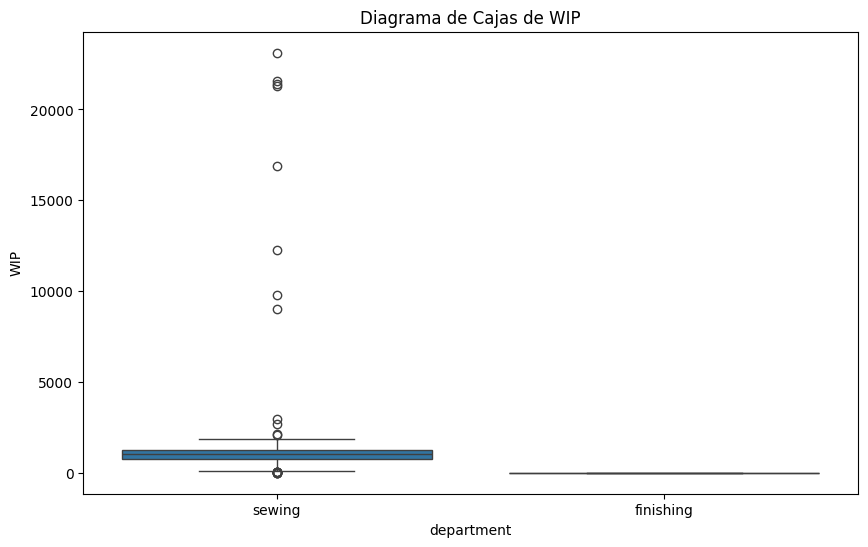

In [893]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['wip'], x=data['department'])
plt.title('Diagrama de Cajas de WIP')
plt.xlabel('department')
plt.ylabel('WIP')
plt.show()

Aquí se puede ver que la única variable que tiene datos faltantes es la de WIP (trabajo en progreso), por lo que haremos un histograma para ver la distribución de dicha variable.

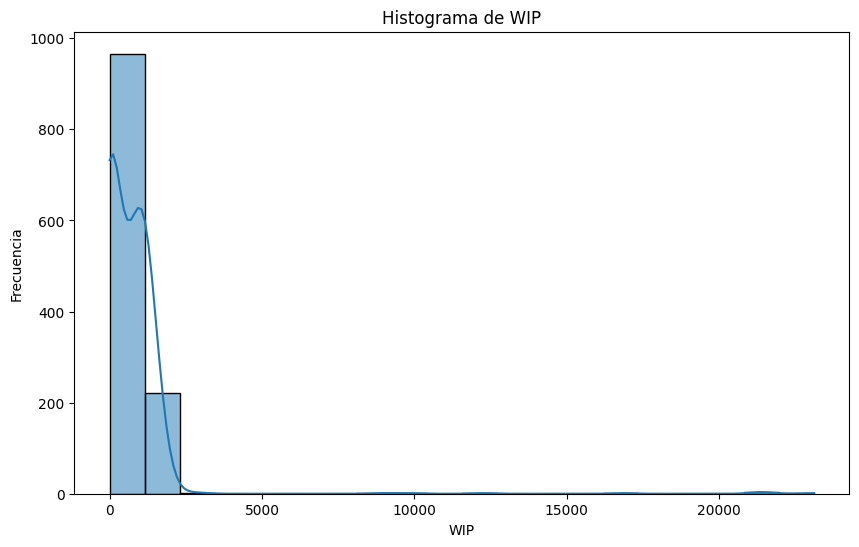

In [894]:
# prompt: Creame un histograma de la variable wip en data

plt.figure(figsize=(10, 6))
sns.histplot(data['wip'], bins=20, kde=True)
plt.title('Histograma de WIP')
plt.xlabel('WIP')
plt.ylabel('Frecuencia')
plt.show()

El histograma de la variable "WIP" muestra una distribución sesgada hacia la derecha, con muchos valores concentrados cerca de cero y algunos valores extremos (outliers) que están muy alejados del resto de los datos. 

Primero crearemos una tabla de correlaciones para ver cómo se comportan las otras variables conforme a WIP.

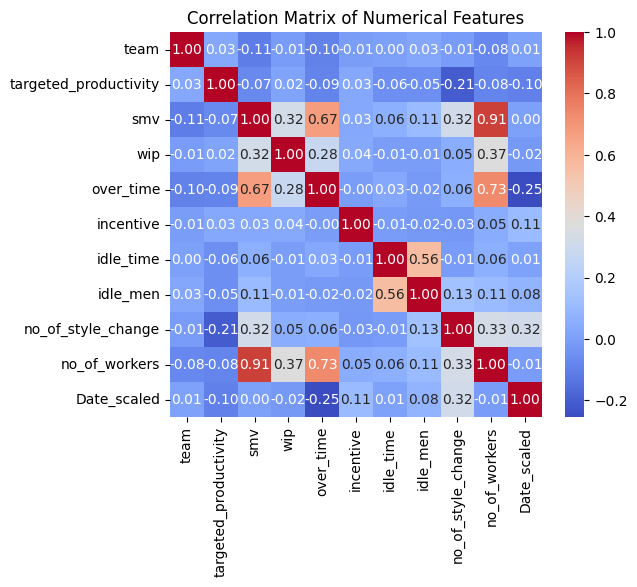

In [895]:
# Extract numerical features for correlation analysis
numerical_features = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Las variables numéricas más correlacionadas con WIP son las siguientes:

*   incentive (0.17): Tiene una correlación positiva moderada.
*   actual_productivity (0.11): Correlación positiva ligera.
*   targeted_productivity (0.06): Correlación positiva baja.
*   no_of_workers (0.03): Correlación positiva baja.
*   over_time (0.02): Correlación positiva mínima.

Podemos observar que la correlación es muy baja y por lo tanto un modelo de regresión lineal múltiple no sería muy adecuado. Por lo tanto, optaremos por utilizar la mediana, que es una medida de tendencia central la cual no se ve afectada por los outliers y que podría funcionar muy bien con estos datos faltantes.

In [896]:
wip_median = data['wip'].median()

data['wip'] = data['wip'].fillna(wip_median)

empty_rows_per_column = data.isnull().sum()
empty_rows_per_column

quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
Date_scaled              0
dtype: int64

Avanzando un poco hacia las inconsistencias, analizamos que la variable de no_of_workers (número de trabajadores por equipo) tiene valores decimales, llegando a tener valores con .5, lo que no es posible ya que estamos hablando de personas y no puede haber media persona, por eso redondearemos dichos valores a su entero más cercano.

In [897]:
data_no_workers_decimal = data[data["no_of_workers"].apply(lambda x: isinstance(x,float) and x !=0 and x % 1 != 0)]
data_no_workers_decimal

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,Date_scaled
2,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570492,0.000000
3,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570492,0.000000
7,Quarter1,sewing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683478,0.000000
9,Quarter1,sewing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750427826,0.000000
10,Quarter1,sewing,Thursday,9,0.70,28.08,872.0,6900,44,0.0,0,0,57.5,0.721126957,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Quarter3,sewing,Sunday,5,0.80,30.10,679.0,7140,0,0.0,0,0,59.5,0.722568627,0.652174
780,Quarter3,sewing,Sunday,4,0.75,30.10,919.0,7140,0,0.0,0,1,59.5,0.598627451,0.652174
782,Quarter3,sewing,Sunday,2,0.80,22.52,12.0,6900,0,0.0,0,0,57.5,0.432122899,0.652174
847,Quarter3,sewing,Thursday,4,0.80,30.10,859.0,7020,63,0.0,0,1,58.5,0.800094017,0.710145


In [898]:
data['no_of_workers'] = round(data['no_of_workers'])

data.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,Date_scaled
0,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725424,0.0
1,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.8865,0.0
2,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.0,0.800570492,0.0
3,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.0,0.800570492,0.0
4,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800381944,0.0


También encontramos que la variable de productividad real está en formato object, lo cual es incorrecto ya que debería de ser un formato de decimales, por lo cual haremos ese cambio.

Adicionalmente se usó como separador de miles el punto. Sin embargo, para pandas este es el separador decimal y lazaba un error al convertir a numeric, entonces se hizo coearce para convertirlos a NaN. A continuación, se muestran estos datos que no se pudieron parse porque tenían como separador de miles el punto, por lo tanto, lo tomaba como un String.

In [899]:
problem_acutal_productivity_decimal = data[data["actual_productivity"].str.count("\.") > 1]
problem_acutal_productivity_decimal["actual_productivity"].head(10)

337    1.033.570.076
437    1.059.621.212
456    1.000.230.409
457    1.000.230.409
477    1.000.230.409
478    1.000.230.409
498    1.000.230.409
518    1.000.457.471
519    1.000.230.409
542       10.115.625
Name: actual_productivity, dtype: object

In [900]:
data['actual_productivity'] = pd.to_numeric(data['actual_productivity'], errors='coerce')
#data['actual_productivity'].fillna(0, inplace=True)

In [901]:
actual_productivity_NAs = data['actual_productivity'].isna().sum()
print(f'Cantidad de datos NAs: {actual_productivity_NAs}')

data_f = data.dropna(subset=["actual_productivity"])
print(data.shape)


Cantidad de datos NAs: 36
(1197, 15)


Además, se revisó si había datos de "actual_produtivity" que no estuvieran dentro del intervalo $0 \leq x_i \leq 1,  \forall i \in n$

In [902]:
problema_actual_productivity_fuera_range = data[(data["actual_productivity"] < 0) | (data["actual_productivity"] > 1)]
problema_actual_productivity_fuera_range

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,Date_scaled
712,Quarter2,finishing,Wednesday,12,0.8,4.08,0.0,1080,0,0.0,0,0,9.0,1.02,0.594203


In [903]:
data_f = data_f.drop(problema_actual_productivity_fuera_range.index)

In [904]:
data_f.shape

(1160, 15)

In [905]:
print(f'Se perdieron {round((data.shape[0]-data_f.shape[0])/data.shape[0]*100,2)}% del total de datos iniciales por datos con valores erróneos.')

Se perdieron 3.09% del total de datos iniciales por datos con valores erróneos.


También ya se revisó y no se encontraron valores negativos en las columnas donde no deberían existir (como SMV, WIP, tiempo extra, incentivos, etc.).

Conforme a datos duplicados solo encontramos que hay varias entradas duplicadas en cuanto a la combinación de fecha y equipo. Esto podría ser un error si no deberían existir múltiples registros por equipo en el mismo día, pero al no saber con exactitud como maneja este aspecto la empresa con la que trabajamos, ignoraremos o aceptaremos que hayan dichos datos duplicados ya que asumimos que un solo equipo puede tener varios trabajos en un solo día.

In [906]:
data = data_f.copy()

#### Conversión de variables categóricas a numéricas:

In [907]:
# Descripción de Variables categóricas
features_cat = data.select_dtypes(include=['object']).columns

for i, feature in enumerate(features_cat):
    print(pd.Series(data[feature]).value_counts())

quarter
Quarter1    348
Quarter2    324
Quarter4    243
Quarter3    204
Quarter5     41
Name: count, dtype: int64
department
sewing       666
finishing    494
Name: count, dtype: int64
day
Wednesday    200
Sunday       196
Monday       195
Tuesday      194
Thursday     193
Saturday     182
Name: count, dtype: int64


Para department, como solo tiene dos categorías, simplemente se asigna 0 para 'sewing' y 1 para 'finishing'. Mientras que para variables categóricas con 3 o más categorías, tanto para quarter como para day las categorías tienen una relación numérica, por lo que se le asigna un valor numérico a cada una.

In [908]:
data['department'] = data['department'].map({'sewing': 0, 'finishing': 1}).astype(int)
data['quarter'] = data['quarter'].map({'Quarter1': 1, 'Quarter2': 2,'Quarter3': 3, 'Quarter4': 4,'Quarter5': 5}).astype(int)
data['day'] = data['day'].map({'Monday': 1, 'Tuesday': 2,'Wednesday': 3, 'Thursday': 4,'Saturday': 5,'Sunday': 5}).astype(int)

print('New Number of Features: %d'%(data.shape[1]))

New Number of Features: 15


## **Tarea 3**
"Realice un análisis exploratorio que permita describir estadística y visualmente el
comportamiento de las variables a considerar. Calcule estadísticas descriptivas, realice
histogramas, diagramas de caja, diagramas de dispersión, diagramas de violín y otros que
permitan comprender como se comportan las variables. Documente el análisis realizado."


In [909]:
data_f.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,Date_scaled
count,1160.000000,1160.000000,1160.00000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000
mean,6.544828,0.727905,15.01481,665.985345,4575.301724,37.012931,0.753448,0.381034,0.155172,34.331034,0.725991,0.498801
std,3.422968,0.098735,11.00475,1457.764493,3363.475857,162.300882,12.910356,3.320081,0.433766,22.161399,0.169404,0.303170
min,1.000000,0.070000,2.90000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705,0.000000
25%,4.000000,0.700000,3.94000,0.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650061,0.231884
50%,7.000000,0.750000,15.26000,565.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.754425,0.478261
75%,9.000000,0.800000,24.26000,1070.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.845167,0.782609
max,12.000000,0.800000,54.56000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,0.999995,1.000000


Con los datos ya procesados y limpios, se realizó de nuevo el analisis de las medidas de tendencia central y de dispersión de los datos. Entre las cosas más importantes a observar para el futuro análisis se encuentran que hay una dispersión significativa en las horas extras (over_time), donde algunos equipos no trabajan horas extras y otros alcanzan valores extremadamente altos, lo que sugiere posibles outliers o diferencias operativas importantes. Segundo, la media de la productividad real (actual_productivity) es cercana al objetivo, pero con una dispersión moderada, lo que indica que, aunque muchos equipos están cerca de su meta, hay variabilidad en el rendimiento. Finalmente, la desviación estándar es baja en la productividad objetivo (targeted_productivity) lo que muestra que los equipos tienen metas de productividad bastante uniformes.

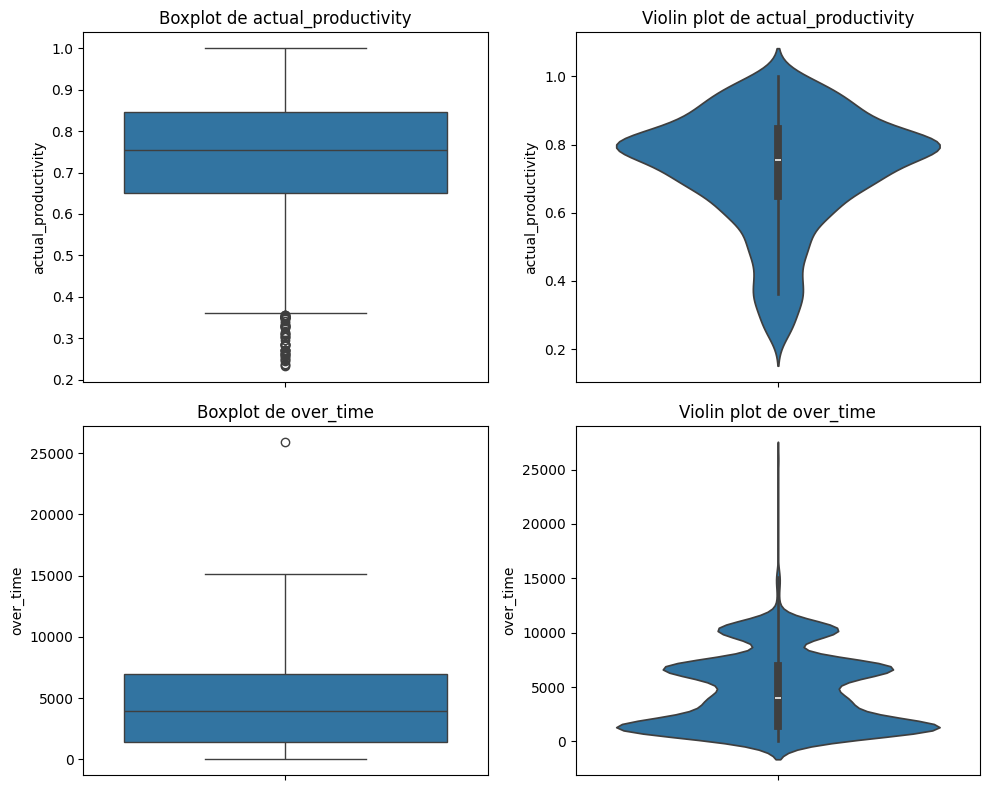

In [910]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.boxplot(y=data_f['actual_productivity'])
plt.title('Boxplot de actual_productivity')

plt.subplot(2, 2, 2)
sns.violinplot(y=data_f['actual_productivity'])
plt.title('Violin plot de actual_productivity')


plt.subplot(2, 2, 3)
sns.boxplot(y=data_f['over_time'])
plt.title('Boxplot de over_time')

plt.subplot(2, 2, 4)
sns.violinplot(y=data_f['over_time'])
plt.title('Violin plot de over_time')

plt.tight_layout()
plt.show()

En los boxplots y violin plots de actual_productivity y over_time se observa una diferencia importante en la dispersión de los datos (como ya se había visto en la descripción de los datos). En actual_productivity, la mayoría de los equipos se concentra entre 0.65 y 0.85, con algunos outliers por debajo de 0.35, lo que sugiere un buen desempeño general, aunque algunos equipos están significativamente por debajo de la meta. En cambio, en over_time, los boxplots y violin plots muestran una distribución mucho más dispersa, con un gran número de outliers, incluido un valor extremo cercano a 25,000 horas extras, lo que indica que algunos equipos trabajan considerablemente más tiempo extra que otros.

**Analizando mas a fondo la variable actual_productivity:**

La productividad media es: 0.7259907713344828
La productividad objetivo es: 0.7279051724137932


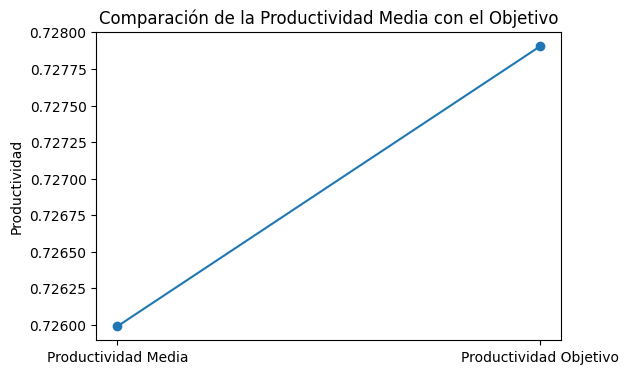

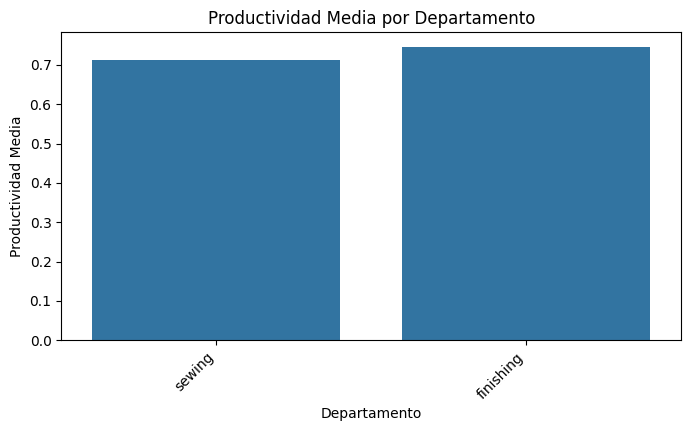

In [911]:
# Calculamos la productividad media
mean_productivity = data_f['actual_productivity'].mean()

# Se define el objetivo de productividad
targeted_productivity = data_f['targeted_productivity'].mean()

# Compara la productividad media con el objetivo
print(f"La productividad media es: {mean_productivity}")
print(f"La productividad objetivo es: {targeted_productivity}")

plt.figure(figsize=(6, 4))
plt.plot([1, 2], [mean_productivity, targeted_productivity], marker='o')
plt.xticks([1, 2], ['Productividad Media', 'Productividad Objetivo'])
plt.ylabel('Productividad')
plt.title('Comparación de la Productividad Media con el Objetivo')
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(x='department', y='actual_productivity', data=data_f, errorbar=None)
plt.xlabel('Departamento')
plt.ylabel('Productividad Media')
plt.title('Productividad Media por Departamento')
plt.xticks(rotation=45, ha='right')
plt.show()



Con estas gráficas y las medias calculadas se observa que la productividad real no está lejos del objetivo, por lo cual solo falta mejorar un poco más para lograr la meta. También se creó un gráfico en donde se evidenciara cual era la productividad dependiendo del departamento, en donde se ve que el departamento de finishing es más productivo que el de sewing, por lo que se debe de prestar más atención en mejorar procesos en dicho departamento.

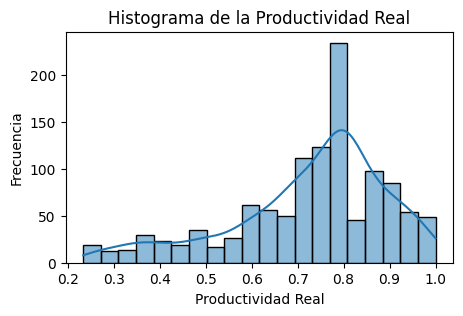

In [912]:
plt.figure(figsize=(5, 3))
sns.histplot(data_f['actual_productivity'], bins=20, kde=True)
plt.title('Histograma de la Productividad Real')
plt.xlabel('Productividad Real')
plt.ylabel('Frecuencia')
plt.show()

El histograma muestra una distribución asimétrica de la productividad real, con una concentración significativa alrededor de 0.8, lo que indica que la mayoría de las observaciones tienen una productividad elevada. A medida que nos alejamos hacia valores menores de productividad (por debajo de 0.7), la frecuencia disminuye de manera notable, lo que sugiere que pocas observaciones tienen un rendimiento bajo. En el extremo derecho, la productividad cercana a 1.0 también es menos común, lo que evidencia que alcanzar niveles máximos de productividad es relativamente raro.

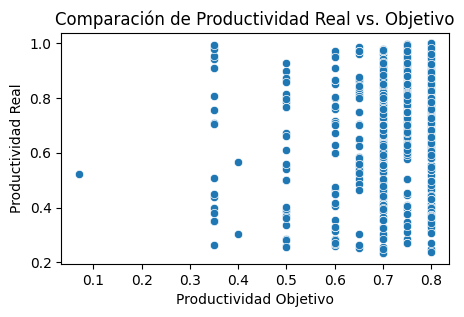

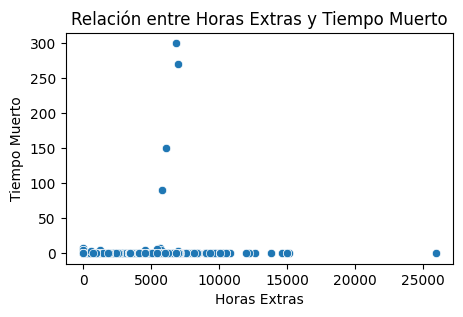

In [913]:
# Comparacion con targeted_productivity usando un scatter plot para ver si los equipos que alcanzan sus objetivos son consistentes.
plt.figure(figsize=(5, 3))
sns.scatterplot(x='targeted_productivity', y='actual_productivity', data=data_f)
plt.title('Comparación de Productividad Real vs. Objetivo')
plt.xlabel('Productividad Objetivo')
plt.ylabel('Productividad Real')
plt.show()

# Se hace un scatter plot con over_time y idle_time para ver si hay alguna relación entre productividad y horas extras o tiempos muertos.
plt.figure(figsize=(5, 3))
sns.scatterplot(x='over_time', y='idle_time', data=data_f)
plt.title('Relación entre Horas Extras y Tiempo Muerto')
plt.xlabel('Horas Extras')
plt.ylabel('Tiempo Muerto')
plt.show()

El primer gráfico muestra una gran variabilidad entre la productividad real y la objetivo, especialmente en el nivel de la mitad, lo que indica que no siempre se alcanzan o superan las metas. En el segundo gráfico, la mayoría de los casos presentan poco tiempo muerto a pesar de las horas extras, aunque algunos valores atípicos sugieren que en ciertas ocasiones las horas adicionales no mejoran la eficiencia y generan inactividad. Continuando con el análisis, se hará una comparación entre la productividad objetivo y las horas de trabajo extra, para ver si los equipos con mayores metas trabajan más:

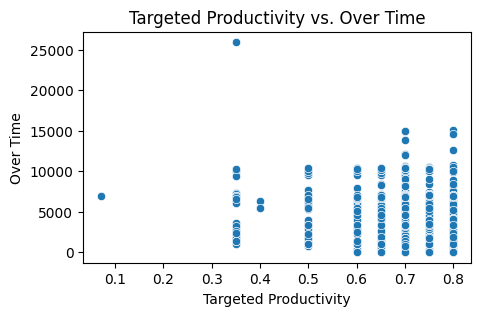

In [914]:
plt.figure(figsize=(5, 3))  # Ajusta el tamaño del gráfico
sns.scatterplot(x='targeted_productivity', y='over_time', data=data_f)
plt.title('Targeted Productivity vs. Over Time')
plt.xlabel('Targeted Productivity')
plt.ylabel('Over Time')
plt.show()

La dispersión de los puntos indica que no existe una relación clara entre el incremento en las metas de productividad y las horas extras trabajadas. Ahora se hará lo mismo, pero para la productividad real para ver que se puede analizar:

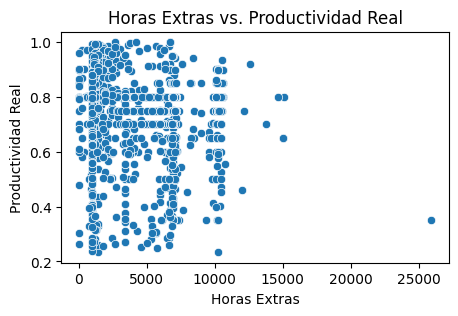

In [915]:
# Comparacion de over_time con actual_productivity usando un scatter plot para ver si el exceso de horas extras se correlaciona con una mayor o menor productividad.
plt.figure(figsize=(5, 3))  # Ajusta el tamaño del gráfico
sns.scatterplot(x='over_time', y='actual_productivity', data=data_f)
plt.title('Horas Extras vs. Productividad Real')
plt.xlabel('Horas Extras')
plt.ylabel('Productividad Real')
plt.show()

Los datos sugieren que no existe una correlación muy clara entre el aumento de horas extras y una mayor productividad real. La mayoría de los puntos están concentrados en bajas cantidades de horas extras, y la productividad varía considerablemente en ese rango. A partir de cierto punto (alrededor de 5000 horas extras), los valores se dispersan más, sin mostrar una tendencia positiva en la productividad. En algunos casos con muchas horas extras, la productividad es baja, lo que puede indicar un impacto negativo del exceso de trabajo en el rendimiento. Ahora seguiremos con el análisis de idle_time:

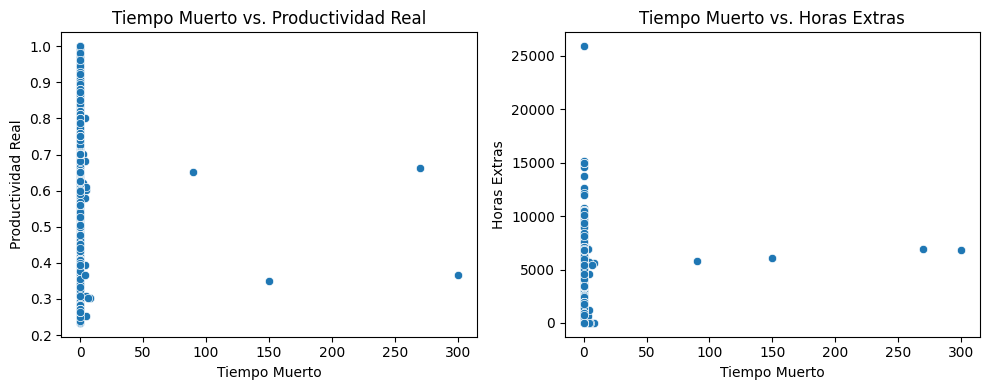

In [916]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 fila, 2 columnas

# Gráfico 1: Scatter plot entre idle_time y actual_productivity
sns.scatterplot(x='idle_time', y='actual_productivity', data=data_f, ax=axes[0])
axes[0].set_title('Tiempo Muerto vs. Productividad Real')
axes[0].set_xlabel('Tiempo Muerto')
axes[0].set_ylabel('Productividad Real')

# Gráfico 2: Scatter plot entre idle_time y over_time
sns.scatterplot(x='idle_time', y='over_time', data=data_f, ax=axes[1])
axes[1].set_title('Tiempo Muerto vs. Horas Extras')
axes[1].set_xlabel('Tiempo Muerto')
axes[1].set_ylabel('Horas Extras')

plt.tight_layout()  # Ajusta el espaciado entre los subplots
plt.show()

El análisis muestra que no hay una relación clara entre el tiempo muerto y la productividad, aunque la mayoría de los equipos con bajo tiempo muerto mantienen una productividad alta. Por otro lado, la comparación entre tiempo muerto y horas extras tampoco revela una correlación significativa, ya que los puntos están dispersos y no siguen un patrón claro entre ambas variables. Continuamos con no_of_workers:

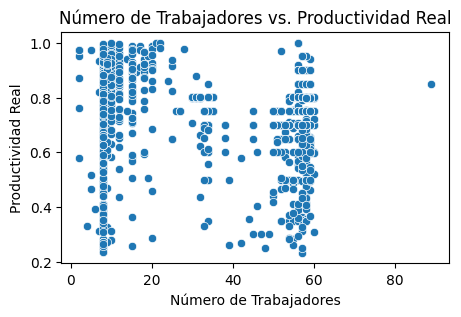

In [917]:
# Comparación de no_of_workers con actual_productivity usando un scatter plot para ver si los equipos más grandes o pequeños tienen un mejor o peor rendimiento.
plt.figure(figsize=(5, 3))
sns.scatterplot(x='no_of_workers', y='actual_productivity', data=data_f)
plt.title('Número de Trabajadores vs. Productividad Real')
plt.xlabel('Número de Trabajadores')
plt.ylabel('Productividad Real')
plt.show()

El análisis entre el número de trabajadores y la productividad real no muestra una relación clara entre el tamaño del equipo y su rendimiento. Tanto los equipos pequeños como los grandes presentan una productividad variable, sin un patrón evidente que indique que un mayor número de trabajadores esté asociado con una productividad más alta o baja. Finalmente, haremos histogramas y algunos otros gráficos para las demás variables para ver su distribución de datos e intentar encontrar algo de interés:

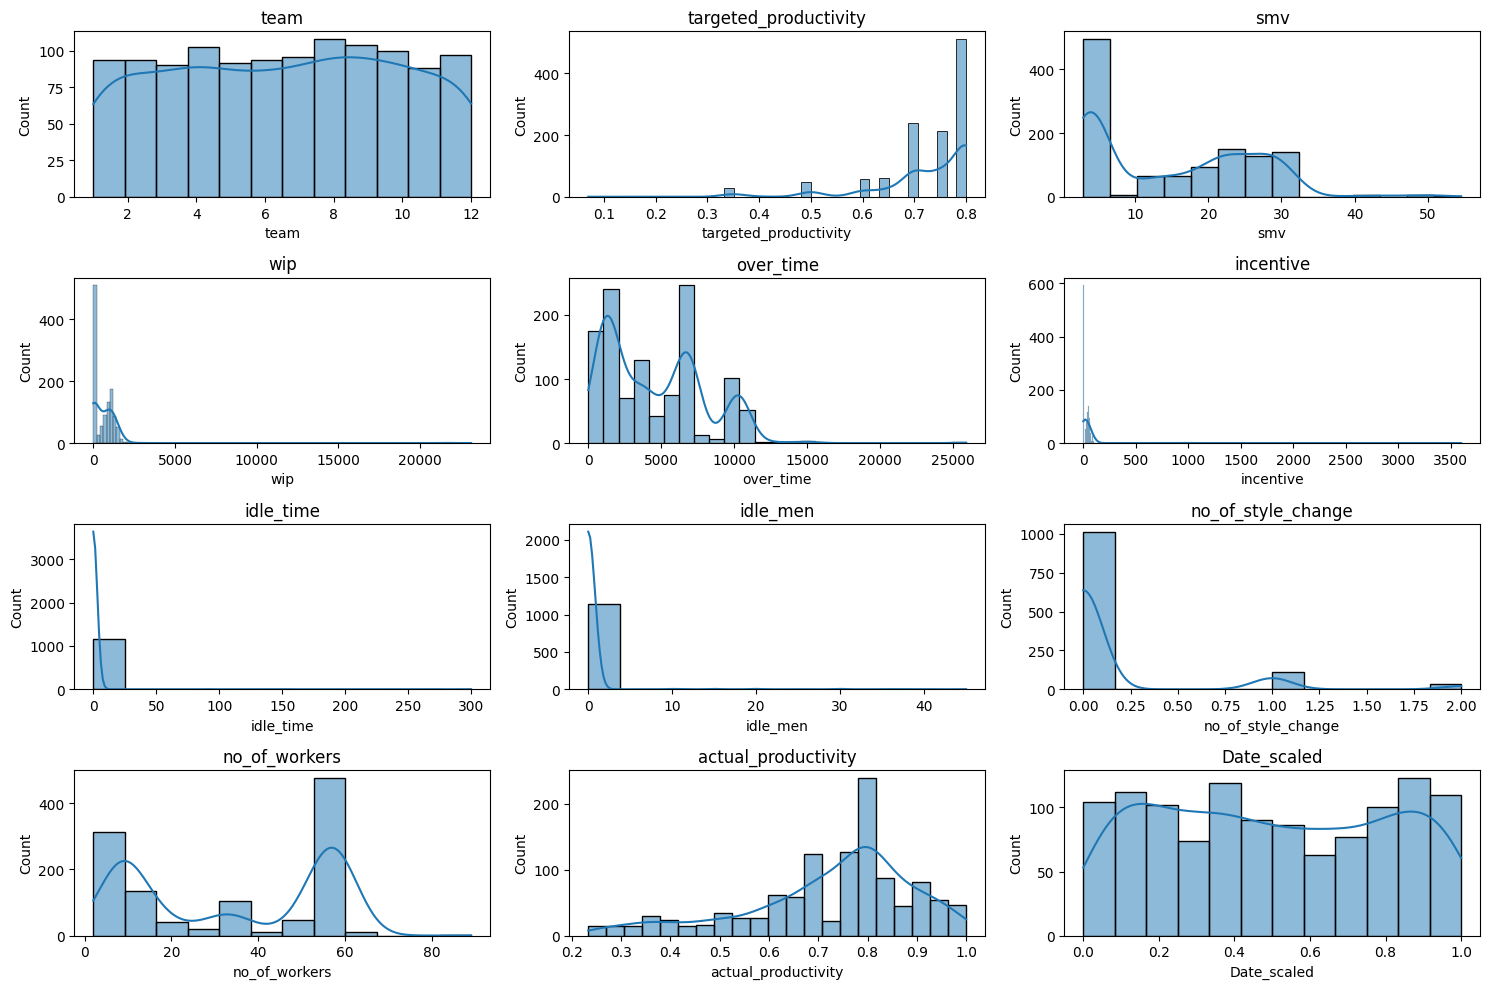

In [918]:
num_vars = len(data_f.select_dtypes(include=np.number).columns)
num_rows = int(np.ceil(np.sqrt(num_vars)))
num_cols = int(np.ceil(num_vars / num_rows))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))  # Ajusta el tamaño de la figura según sea necesario

# Iterar a través de las variables numéricas y crear histogramas
for i, col in enumerate(data_f.select_dtypes(include=np.number).columns):
    row = i // num_cols
    col_index = i % num_cols
    sns.histplot(data_f[col], ax=axes[row, col_index], kde=True)
    axes[row, col_index].set_title(col)

# Eliminar los subplots vacíos si es necesario
for i in range(num_vars, num_rows * num_cols):
    row = i // num_cols
    col_index = i % num_cols
    fig.delaxes(axes[row, col_index])

plt.tight_layout()
plt.show()

En el análisis de todos los histogramas, se observan varias tendencias que no se habían revisado antes. La **productividad objetivo (`targeted_productivity`)** se encuentra mayormente en el rango de 0.7 a 0.8, sugiriendo que se establecen metas bastante elevadas para los equipos. En cuanto a las **horas extras (`over_time`)**, hay una concentración en el rango bajo (0 a 5000), pero también se observan algunos valores extremos, lo que indica que ciertos equipos trabajan muchas más horas extras que otros. El **tiempo muerto (`idle_time`)** tiene una alta frecuencia de valores cercanos a 0, lo cual es positivo ya que sugiere que la mayoría de los equipos no desperdician mucho tiempo, aunque algunos pocos tienen tiempos muertos elevados. Finalmente, el **número de cambios de estilo (`no_of_style_change`)** es extremadamente bajo para la mayoría de los equipos, con muchos sin cambios, lo que podría estar relacionado con una mayor estabilidad en las operaciones. A continuación hay diagramas de violín y boxplots de cada variable:

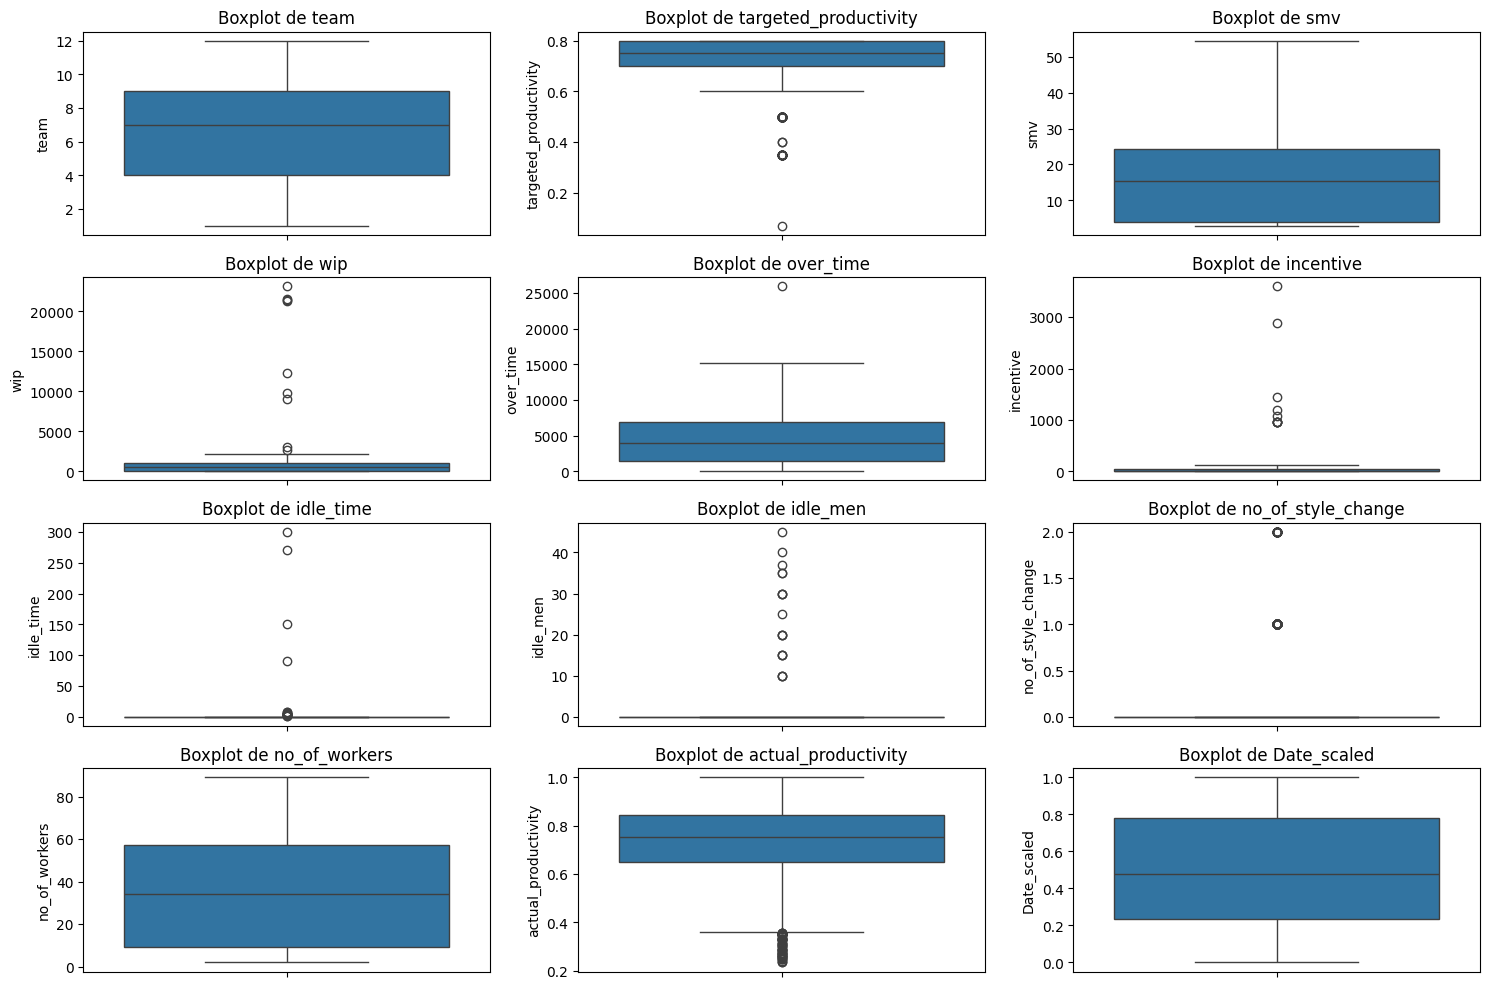

In [919]:
# Crear boxplots y violin plots para las variables numéricas
num_vars = len(data_f.select_dtypes(include=np.number).columns)
num_rows = int(np.ceil(np.sqrt(num_vars)))
num_cols = int(np.ceil(num_vars / num_rows))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, col in enumerate(data_f.select_dtypes(include=np.number).columns):
    row = i // num_cols
    col_index = i % num_cols

    # Boxplot
    sns.boxplot(y=data_f[col], ax=axes[row, col_index])
    axes[row, col_index].set_title(f'Boxplot de {col}')

# Eliminar subplots vacíos si es necesario
for i in range(num_vars, num_rows * num_cols):
    row = i // num_cols
    col_index = i % num_cols
    fig.delaxes(axes[row, col_index])

plt.tight_layout()
plt.show()



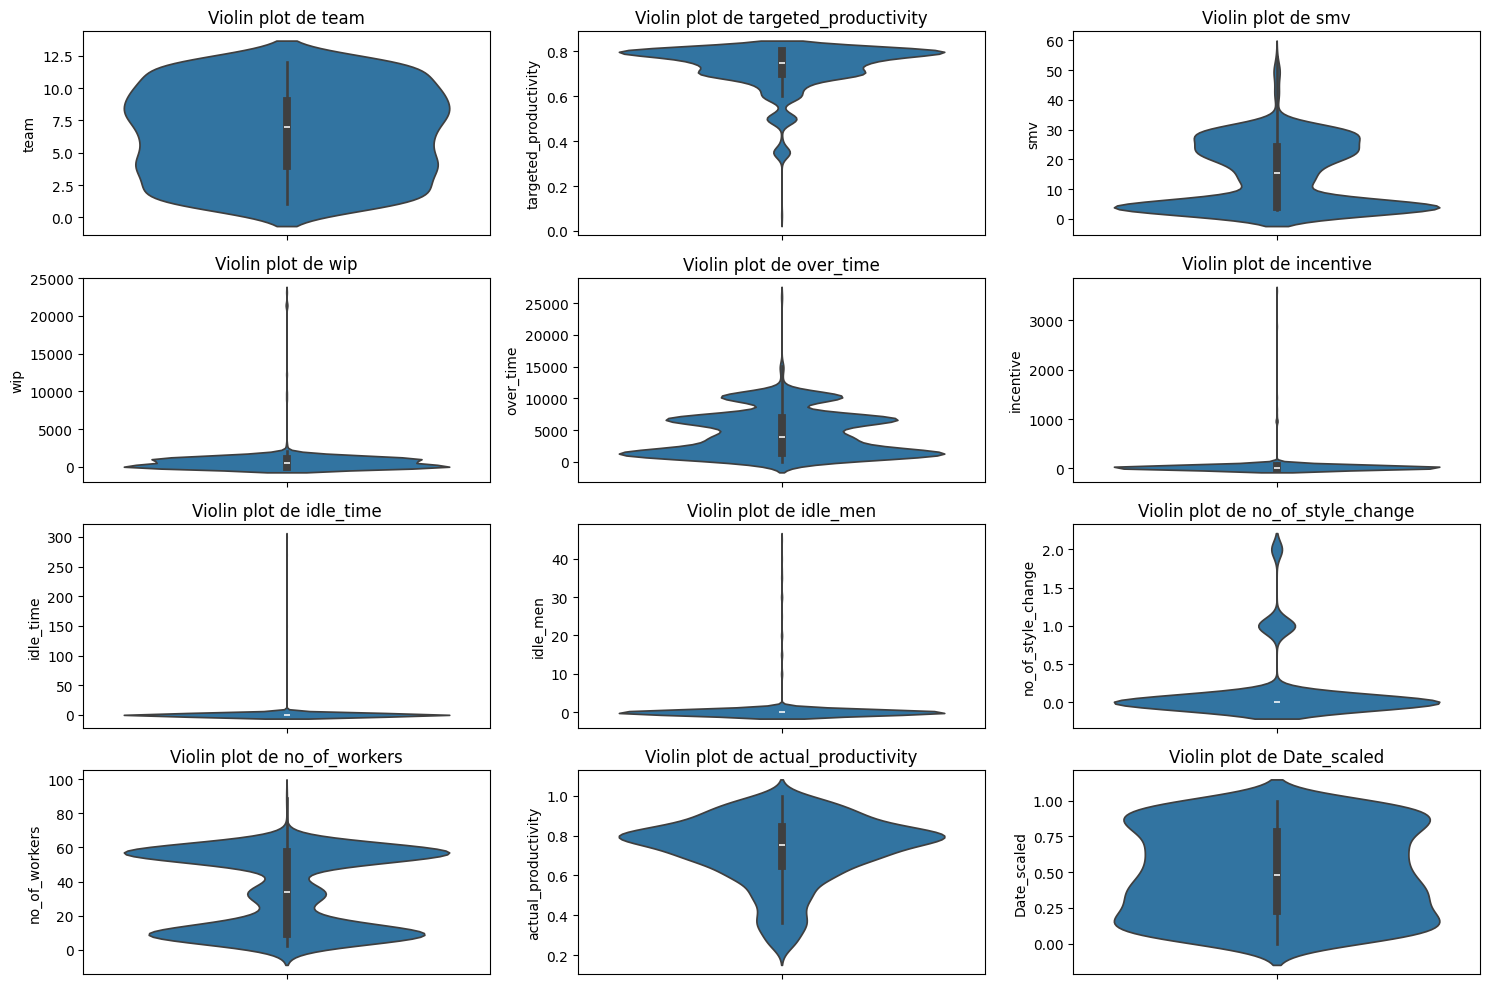

In [920]:
# Crear diagramas de violín para las variables numéricas
num_vars = len(data_f.select_dtypes(include=np.number).columns)
num_rows = int(np.ceil(np.sqrt(num_vars)))
num_cols = int(np.ceil(num_vars / num_rows))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, col in enumerate(data_f.select_dtypes(include=np.number).columns):
    row = i // num_cols
    col_index = i % num_cols

    # Violin plot
    sns.violinplot(y=data_f[col], ax=axes[row, col_index])
    axes[row, col_index].set_title(f'Violin plot de {col}')

# Eliminar subplots vacíos si es necesario
for i in range(num_vars, num_rows * num_cols):
    row = i // num_cols
    col_index = i % num_cols
    fig.delaxes(axes[row, col_index])

plt.tight_layout()
plt.show()

## **Tarea 4**
"Aquí deberá explorar los diferentes modelos y diferentes configuraciones de estos,
realizar ingeniería de características (variables), emplear diferentes métodos de estimación,
comparar y seleccionar las mejores alternativas, considerando diferentes métricas. Consulte bibliografía que le permita contar con elementos para proponer los modelos. No es
necesario emplear todas las variables disponibles, pero todas las variables incluidas y sus
relaciones deben estar correctamente justificadas. Como hay un buen número de variables,
se espera que el modelo desarrollado por cada equipo sea único. Evalúe su modelo usando
métricas apropiadas. Documente el modelamiento realizado."

### Modelamiento

Separación de datos:

In [921]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en características y variable objetivo
X = data.drop(columns=['actual_productivity'])
Y = data['actual_productivity']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### Modelos Lineales:

In [922]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Crear y entrenar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicción
linear_y_pred = linear_model.predict(X_test)

# Calcular métricas
linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, linear_y_pred)

# Imprimir reporte
print("Modelo Lineal")
print(f"Mean Squared Error (MSE): {linear_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {linear_rmse:.4f}")
print(f"R^2 Score: {linear_r2:.4f}")


Modelo Lineal
Mean Squared Error (MSE): 0.0194
Root Mean Squared Error (RMSE): 0.1394
R^2 Score: 0.2402


#### Modelos No Lineales:

In [923]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Parámetros para optimización
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'max_samples': [0.6, 0.8, 1.0]
}

# Modelo Random Forest con optimización de hiperparámetros
RF_model = RandomForestRegressor(random_state=42)
RF_search = RandomizedSearchCV(RF_model, param_grid, n_iter=10, cv=3, random_state=42, n_jobs=-1)
RF_search.fit(X_train, y_train)

# Mejor modelo
RF_best_model = RF_search.best_estimator_

# Predicción
RF_y_pred = RF_best_model.predict(X_test)

# Calcular métricas
RF_mse = mean_squared_error(y_test, RF_y_pred)
RF_rmse = np.sqrt(RF_mse)
RF_r2 = r2_score(y_test, RF_y_pred)

# Imprimir reporte
print("Random Forest")
print(f"Mean Squared Error (MSE): {RF_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {RF_rmse:.4f}")
print(f"R^2 Score: {RF_r2:.4f}")

# Imprimir los mejores hiperparámetros
RF_best_params = RF_search.best_params_
print("\nMejores Hiperparámetros para Random Forest:")
for param, value in RF_best_params.items():
    print(f"{param}: {value}")


Random Forest
Mean Squared Error (MSE): 0.0114
Root Mean Squared Error (RMSE): 0.1067
R^2 Score: 0.5543

Mejores Hiperparámetros para Random Forest:
n_estimators: 100
min_samples_split: 2
min_samples_leaf: 1
max_samples: 1.0
max_features: sqrt
max_depth: 50


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


#### Redes Neuronales:

In [924]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV

# Escalado de características 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el espacio de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (100,50), (100,100,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [500, 1000, 1500]
}

# Crear el modelo de red neuronal
nn_model = MLPRegressor(random_state=42)

# Optimización de hiperparámetros usando RandomizedSearchCV
nn_search = RandomizedSearchCV(nn_model, param_distributions=param_grid, n_iter=10, cv=3, random_state=42, n_jobs=-1)
nn_search.fit(X_train_scaled, y_train)

# Obtener el mejor modelo
nn_best_model = nn_search.best_estimator_

# Predicción con el mejor modelo
nn_y_pred = nn_best_model.predict(X_test_scaled)

# Calcular métricas
nn_mse = mean_squared_error(y_test, nn_y_pred)
nn_rmse = np.sqrt(nn_mse)
nn_r2 = r2_score(y_test, nn_y_pred)

# Imprimir reporte de métricas y los mejores hiperparámetros
print("Red Neuronal")
print(f"Mean Squared Error (MSE): {nn_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {nn_rmse:.4f}")
print(f"R^2 Score: {nn_r2:.4f}")

# Imprimir los mejores hiperparámetros
best_params_nn = nn_search.best_params_
print("\nMejores Hiperparámetros para el Modelo de Red Neuronal:")
for param, value in best_params_nn.items():
    print(f"{param}: {value}")


Red Neuronal
Mean Squared Error (MSE): 0.0197
Root Mean Squared Error (RMSE): 0.1404
R^2 Score: 0.2292

Mejores Hiperparámetros para el Modelo de Red Neuronal:
solver: sgd
max_iter: 1500
learning_rate_init: 0.1
learning_rate: constant
hidden_layer_sizes: (100, 50)
alpha: 0.01
activation: relu


**Conclusiones:**

Se implementaron modelos lineales, no lineales, y redes neuronales, con su respectiva optimización de hiperparámetros. Al analizar las métricas arrojadas por los modelos, es evidente que el mejor modelo fue Random Forest, con un con un R^2 de 0.5543 y un RMSE de 0.1067. 

#### Ingeniería de catacterísticas para Random Forest:

Para seleccionar la mejor configuración de características, se calcula su importancia para el modelo y se eliminan iterativamente las menos significativas, volviendo a entrenar y probar el modelo cada vez.

In [925]:
# Hacer una copia de los datos de entrenamiento
X_train_iter = X_train.copy()
X_test_iter = X_test.copy()

# Definir el modelo
model = RandomForestRegressor(n_estimators=100,
                              min_samples_split=2, 
                              min_samples_leaf=1, 
                              max_samples=1.0, 
                              max_features='sqrt', 
                              max_depth=50,
                              random_state=42)

# Iteración 0
print("Iteración 0:")
feature_importances = RF_best_model.feature_importances_

# Crear un dataframe para las importancias de las características
feature_importance_df = pd.DataFrame({'Feature': X_train_iter.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Ubicar la característica con menos importancia
last_feature = feature_importance_df.iloc[-1]['Feature']

print(f"Mean Squared Error (MSE): {RF_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {RF_rmse:.4f}")
print(f"R^2 Score: {RF_r2:.4f}")
print("Importancia de las características:")
print(feature_importance_df)
print(f"\nSiguiente característica por eliminar: {last_feature}")
print("-" * 40)

# Eliminar la característica menos importante de los datos de entrenamiento y prueba
X_train_iter = X_train_iter.drop(columns=[last_feature])
X_test_iter = X_test_iter.drop(columns=[last_feature])

# Iterar para eliminar la característica menos importante en cada paso
for i in range(1, 6):
    print(f"Iteración: {i}")

    # Entrenar el modelo
    model.fit(X_train_iter, y_train)
    
    # Predecir con el modelo entrenado
    y_pred = model.predict(X_test_iter)

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calcular la importancia de las características
    feature_importances = model.feature_importances_
    
    # Crear un dataframe para las importancias de las características
    feature_importance_df = pd.DataFrame({'Feature': X_train_iter.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
    
    # Ubicar la característica con menos importancia
    last_feature = feature_importance_df.iloc[-1]['Feature']

    # Imprimir reporte
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    print("Importancia de las características:")
    print(feature_importance_df)
    print(f"\nSiguiente característica por eliminar: {last_feature}")
    print("-" * 40)
    
    # Eliminar la característica menos importante de los datos de entrenamiento y prueba
    X_train_iter = X_train_iter.drop(columns=[last_feature])
    X_test_iter = X_test_iter.drop(columns=[last_feature])


Iteración 0:
Mean Squared Error (MSE): 0.0114
Root Mean Squared Error (RMSE): 0.1067
R^2 Score: 0.5543
Importancia de las características:
                  Feature  Importance
4   targeted_productivity    0.161334
13            Date_scaled    0.135613
3                    team    0.104359
5                     smv    0.102949
8               incentive    0.101031
12          no_of_workers    0.092811
7               over_time    0.088927
0                 quarter    0.063377
2                     day    0.056652
6                     wip    0.037233
11     no_of_style_change    0.021248
1              department    0.015317
9               idle_time    0.011163
10               idle_men    0.007988

Siguiente característica por eliminar: idle_men
----------------------------------------
Iteración: 1
Mean Squared Error (MSE): 0.0116
Root Mean Squared Error (RMSE): 0.1077
R^2 Score: 0.5466
Importancia de las características:
                  Feature  Importance
4   targeted_productivit

Después de la ingeniería de características, el mejor modelo sigue siendo el original.

Al observar la matriz de correlaciones entre todas las características, se puede ver que hay varias características altamente correlacionadas entre sí. Esto podría ser un problema, por lo que se evalúa la posibilidad de eliminarlas del modelo.

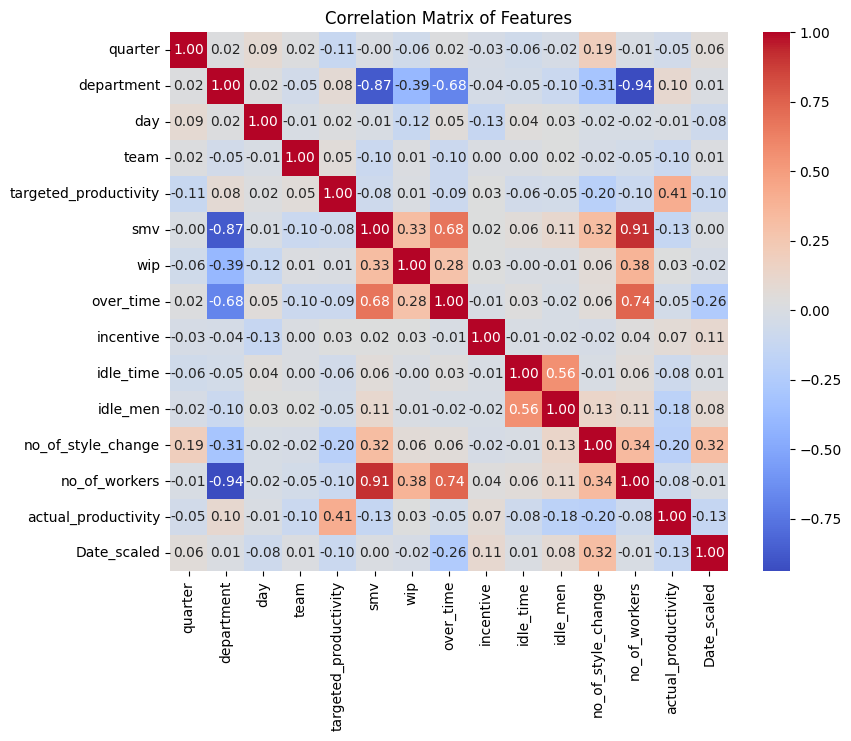

Text(0.5, 1.0, 'Coeficientes de Correlación X vs Y')

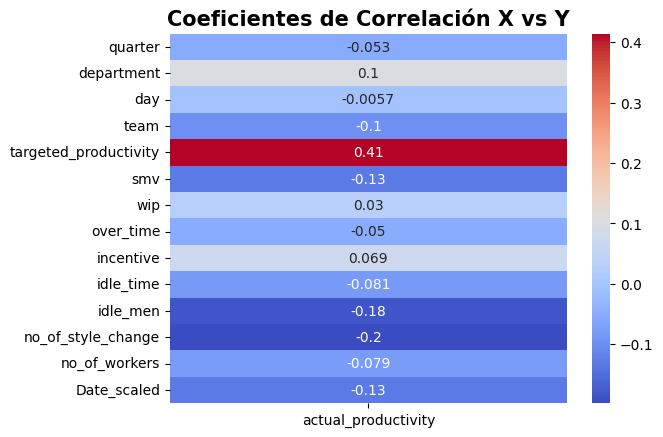

In [926]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# Correalacion entre variables de respuesta y varaibles explicativas
corrw = data.drop(["actual_productivity"], axis=1).corrwith(data["actual_productivity"])
fig = sns.heatmap(pd.DataFrame(corrw), cmap='coolwarm', annot=True, xticklabels=["actual_productivity"])
fig.set_title("Coeficientes de Correlación X vs Y", fontdict={"color": "black", "weight": "bold", "fontsize": "15"})

Después de analizar estos gráficos, se decidió eliminiar las variables no_of_workers, over_time y department, ya que presentan una fuerte correlación entre ellas y con la variable smv, que es más significativa para la variable objetivo que las otras. 

Luego de esto, se obtiene la matriz de correlaciones presentada a continuación.

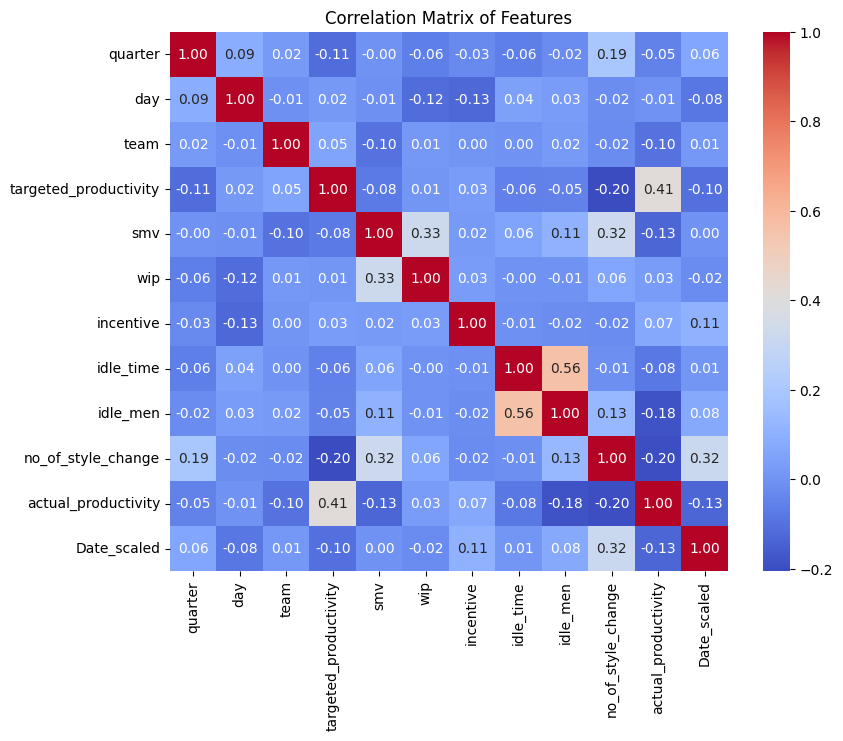

Text(0.5, 1.0, 'Coeficientes de Correlación X vs Y')

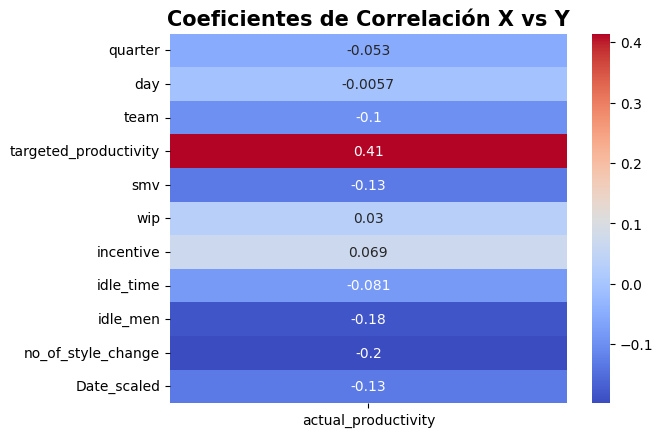

In [927]:
# Se eliminan la caracteríaticas por alta correlación
data_def = data.drop(columns = ["no_of_workers", "over_time", "department"])

# Calculate the correlation matrix
correlation_matrix = data_def.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# Correalacion entre variables de respuesta y varaibles explicativas
corrw = data_def.drop(["actual_productivity"], axis=1).corrwith(data_def["actual_productivity"])
fig = sns.heatmap(pd.DataFrame(corrw), cmap='coolwarm', annot=True, xticklabels=["actual_productivity"])
fig.set_title("Coeficientes de Correlación X vs Y", fontdict={"color": "black", "weight": "bold", "fontsize": "15"})

In [928]:
# Dividir el conjunto de datos en características y variable objetivo
X = data_def.drop(columns=['actual_productivity'])
Y = data_def['actual_productivity']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [929]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Lista de modelos
modelos = {
    "Regresión Lineal": LinearRegression(),
    "Random Forest":RandomForestRegressor(
        n_estimators=100,
        min_samples_split=2, 
        min_samples_leaf=1, 
        max_samples=1.0, 
        max_features='sqrt', 
        max_depth=50
    ),
    "Red Neuronal": MLPRegressor(
        solver='sgd',
        max_iter=1000,
        learning_rate_init=0.1,
        learning_rate='adaptive',
        hidden_layer_sizes=(100, 100, 50),
        alpha=0.0001,
        activation='relu',
        random_state=42
    )
}

print('Métricas DESPUÉS de eliminar "no_of_workers", "over_time", "department":')

# Entrenar y evaluar cada modelo
for nombre_modelo, modelo in modelos.items():
    # Si es la red neuronal, escalamos los datos
    if nombre_modelo == "Red Neuronal":
        modelo.fit(X_train_scaled, y_train)
        y_pred = modelo.predict(X_test_scaled)
    else:
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
    
    # Calcular las métricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Imprimir reporte para cada modelo
    print(f"\nModelo: {nombre_modelo}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R^2 Score: {r2:.4f}")


Métricas DESPUÉS de eliminar "no_of_workers", "over_time", "department":

Modelo: Regresión Lineal
Mean Squared Error (MSE): 0.0202
Root Mean Squared Error (RMSE): 0.1423
R^2 Score: 0.2082

Modelo: Random Forest
Mean Squared Error (MSE): 0.0155
Root Mean Squared Error (RMSE): 0.1247
R^2 Score: 0.3921

Modelo: Red Neuronal
Mean Squared Error (MSE): 0.0179
Root Mean Squared Error (RMSE): 0.1336
R^2 Score: 0.3015


Como se puede ver, al eliminar estas características, las métricas de los modelos empeoran. Por lo que se prueba volviendo a hacer la optimización de hiperparámetros para Random Forest (que sigue siendo el mejor):

In [930]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Parámetros para optimización
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'max_samples': [0.6, 0.8, 1.0]
}

# Modelo Random Forest con optimización de hiperparámetros
RF_model = RandomForestRegressor(random_state=42)
RF_search = RandomizedSearchCV(RF_model, param_grid, n_iter=10, cv=3, random_state=42, n_jobs=-1)
RF_search.fit(X_train, y_train)

# Mejor modelo
RF_best_model = RF_search.best_estimator_

# Predicción
RF_y_pred = RF_best_model.predict(X_test)

# Calcular métricas
RF_mse = mean_squared_error(y_test, RF_y_pred)
RF_rmse = np.sqrt(RF_mse)
RF_r2 = r2_score(y_test, RF_y_pred)

# Imprimir reporte
print("Random Forest")
print(f"Mean Squared Error (MSE): {RF_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {RF_rmse:.4f}")
print(f"R^2 Score: {RF_r2:.4f}")

# Imprimir los mejores hiperparámetros
RF_best_params = RF_search.best_params_
print("\nMejores Hiperparámetros para Random Forest:")
for param, value in RF_best_params.items():
    print(f"{param}: {value}")

Random Forest
Mean Squared Error (MSE): 0.0140
Root Mean Squared Error (RMSE): 0.1184
R^2 Score: 0.4513

Mejores Hiperparámetros para Random Forest:
n_estimators: 200
min_samples_split: 2
min_samples_leaf: 2
max_samples: 1.0
max_features: log2
max_depth: 30


Los resultados, aunque mejoraron, siguen sin superar los de la configuración original.